# Investigating the relationship between number of words and sentiment

A Linear Regression model was developed to investigate the relationship between the length of the tweet 
(word count) and sentiment of the tweet as determined by sentiment analysis with TextBlog (notebook 2).

## Load the data

In [1]:
import pandas as pd

df = pd.read_pickle('../data/tweet_lengths_df.pkl')
df.head()

,length,sentiment,tweet_preprocessed,label
id,,,,
1,47,0.00,ben mellor want the tories out he rocks up su...,neutral
2,16,0.40,richard ayoade doesnt even sound like he belie...,positive
3,8,0.00,if sht was chocolate no body would starve,neutral
4,7,0.00,let me guess you also voted brexit,neutral
5,32,0.25,join our webinar with speakers from hogan love...,positive


## Segment the data

Divide the data into X and y values (length and sentiment). 

In [2]:
XY = df.copy()
X = XY[['length','label']]
y = XY.pop('sentiment')

## Visualise the data. 

Plot the sentiment of the tweet against its length, as well as the mean
sentiment for each value of word count. 

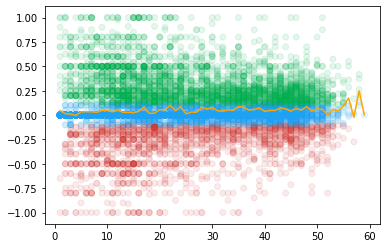

In [3]:
import matplotlib.pyplot as plt
from brexittweets.custom_funcs.utils import color_vals
from brexittweets.config import plots_output_path as pltpath

color = df['sentiment'].apply(color_vals)

# Calculate the mean sentiment at each value of length and plot alongside raw data
mean_sentiment = df.groupby('length')['sentiment'].mean()

plt.scatter(X['length'],y,alpha=0.1,c=color)
plt.plot(mean_sentiment.index, mean_sentiment, color = 'orange')
plt.savefig(pltpath+'/sentiment_wordcount.png')
plt.show()

There does not appear to be correlation between length and sentiment, 
but linear regression will be attempted anyway.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Take a stratified sample using the 'label' feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X['label'])
X_train.pop('label')
X_test.pop('label')

regression = LinearRegression()
regression.fit(X_train, y_train)
y_predicted = regression.predict(X_test)

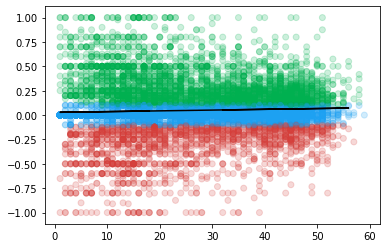

In [5]:
# Inspect the model with a plot
plt.scatter(X['length'],y,alpha=0.2, c=color)
plt.plot(X_test, y_predicted, color = 'black')
plt.savefig(pltpath + '/linear_regression_model.png')
plt.show()

## Evaluating the model

Use Sci-Kit Learn's `metrics` to evaluate the model.

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score

# The coefficients
print('Coefficient: \n', regression.coef_[0])
# The intercept
print('Intercept: \n',regression.intercept_)
# The mean squared error
print(f'Mean absolute error: {mean_absolute_error(y_test, y_predicted)}')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination (R2 score): {r2_score(y_test,y_predicted)}')

Coefficient: 
 0.000786678654385694
Intercept: 
 0.027627869674341825
Mean absolute error: 0.17113204874007162
Coefficient of determination (R2 score): 0.0026391930404945363


Plot the difference between the actual y values (y_test) and the predicted values (y_predicted).

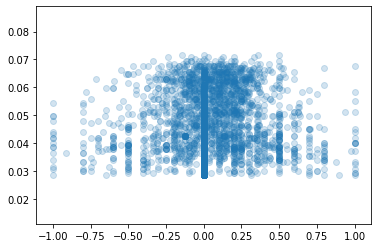

In [7]:
plt.scatter(y_test,y_predicted,alpha=0.2)

There's no correlation between predicted value of sentiment and actual value of sentiment.

This model looks like - and performs about as well as - a horizontal line through the data,
suggesting that there is no correlation between number of words in a Tweet and sentiment.